In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Print shapes of the datasets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9471s 56us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [7]:
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

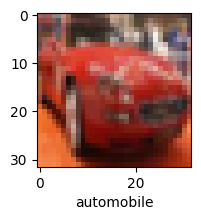

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train,y_train,5)

In [10]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.2793 - loss: 2.0857 - val_accuracy: 0.3705 - val_loss: 1.7614
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.3817 - loss: 1.7234 - val_accuracy: 0.3977 - val_loss: 1.6748
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4162 - loss: 1.6419 - val_accuracy: 0.4065 - val_loss: 1.6447
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4339 - loss: 1.5986 - val_accuracy: 0.4369 - val_loss: 1.5774
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4439 - loss: 1.5763 - val_accuracy: 0.4367 - val_loss: 1.5770
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4478 - loss: 1.5549 - val_accuracy: 0.4423 - val_loss: 1.5719
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4569 - loss: 1.5324 - val_accuracy: 0.4464 - val_loss: 1.5513
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4644 -

In [11]:
def preprocess_image(image):
    image = image.astype('float32') / 255.0
    return np.expand_dims(image, axis=0)  


def predict_image_class(model, image):
    processed_image = preprocess_image(image)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions)
    predicted_class_name = classes[predicted_class]
    return predicted_class, predicted_class_name




In [12]:
index = 5
predicted_class, predicted_class_name = predict_image_class(model, x_test[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


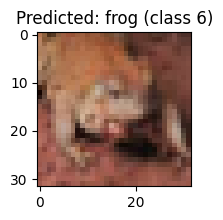

In [13]:
plt.figure(figsize=(4, 2))
plt.imshow(x_test[index])
plt.title(f"Predicted: {predicted_class_name} (class {predicted_class})")
plt.show()